In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import datetime
from datetime import date, timedelta

In [4]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

In [7]:
from sklearn.metrics import mean_squared_error

In [8]:
def stockPrice(val ,title) :

    today = date.today()

    d1       = today.strftime("%Y-%m-%d")
    end_date = d1

    d2         = date.today() - timedelta(days=5000) 
    d2         = d2.strftime("%Y-%m-%d")
    start_date = d2


    data = yf.download(
                          val                   , 
                          start    = start_date , 
                          end      = end_date   , 
                          progress = False
                      )

    data = data[["Close"]]
    print(data)
    
    plt.figure(figsize=(20, 10))
    plt.ylabel('Price')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.plot(data.index, data['Close'], )
    plt.show()
    

    train = data[data.index < pd.to_datetime("2023-01-01", format='%Y-%m-%d')]
    test  = data[data.index > pd.to_datetime("2023-01-01", format='%Y-%m-%d')]
    
    plt.figure(figsize=(20, 10))
    plt.plot(train, color = "black" , label = 'Train')
    plt.plot(test, color = "red"  , label = 'Test')
    plt.ylabel('Stock Price')
    plt.xlabel('Date')
    plt.title("Stock Price Data")
    
    y = train['Close']
   
                                                     ## Model 1 : Autoregressive Moving Average (ARMA)

    ARMA_model = SARIMAX(y, order = (1, 0, 1))
    ARMA_model = ARMA_model.fit()

    y_pred_arma      = ARMA_model.get_forecast(len(test.index))
    y_pred_data_arma = y_pred_arma.conf_int(alpha = 0.05) 

    y_pred_data_arma["Predictions"] = ARMA_model.predict(start = y_pred_data_arma.index[0], end = y_pred_data_arma.index[-1])
    y_pred_data_arma.index          = test.index

    y_pred_out_arma = y_pred_data_arma["Predictions"]

    plt.plot(y_pred_out_arma, color='green', label = 'ARMA Predictions')
    plt.legend()
    
    arma_rmse = np.sqrt(mean_squared_error(test["Close"].values, y_pred_data_arma["Predictions"]))
    print("RMSE: ",arma_rmse) 




                                                 ## Model 2 : Autoregressive Integrated Moving Average (ARIMA)
    ARIMA_model = ARIMA(y, order = (2,4,2))
    ARIMA_model = ARIMA_model.fit()

    y_pred_arima      = ARIMA_model.get_forecast(len(test.index))
    y_pred_data_arima = y_pred_arima.conf_int(alpha = 0.05) 

    y_pred_data_arima["Predictions"] = ARIMA_model.predict(start = y_pred_data_arima.index[0], end = y_pred_data_arima.index[-1])
    y_pred_data_arima.index          = test.index

    y_pred_out_arima = y_pred_data_arima["Predictions"] 

    plt.plot(y_pred_out_arima, color='Yellow', label = 'ARIMA Predictions')
    plt.legend()

    arma_rmse = np.sqrt(mean_squared_error(test["Close"].values, y_pred_data_arima["Predictions"]))
    print("RMSE: ",arma_rmse)




                                                  ## Model 3 : Seasonal ARIMA (SARIMA)
    
    SARIMAXmodel = SARIMAX(y, order = (5, 4, 2), seasonal_order=(2,2,2,12))
    SARIMAXmodel = SARIMAXmodel.fit()

    y_pred      = SARIMAXmodel.get_forecast(len(test.index))
    y_pred_data = y_pred.conf_int(alpha = 0.05) 

    y_pred_data["Predictions"] = SARIMAXmodel.predict(start = y_pred_data.index[0], end = y_pred_data.index[-1])
    y_pred_data.index          = test.index

    y_pred_out = y_pred_data["Predictions"] 

    plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
    plt.legend()
    plt.show()
    
    sarima_rmse = np.sqrt(mean_squared_error(test["Close"].values, y_pred_data["Predictions"]))
    print("RMSE: ",sarima_rmse)

Available Stocks : 

1. Apple 

2. Bitcoin 

3. Netflix 

Enter name of stock or -1 to exit: 1
                 Close
Date                  
2009-07-06    4.950357
2009-07-07    4.835714
2009-07-08    4.900714
2009-07-09    4.870000
2009-07-10    4.947143
...                ...
2023-03-08  152.869995
2023-03-09  150.589996
2023-03-10  148.500000
2023-03-13  150.470001
2023-03-14  152.589996

[3447 rows x 1 columns]


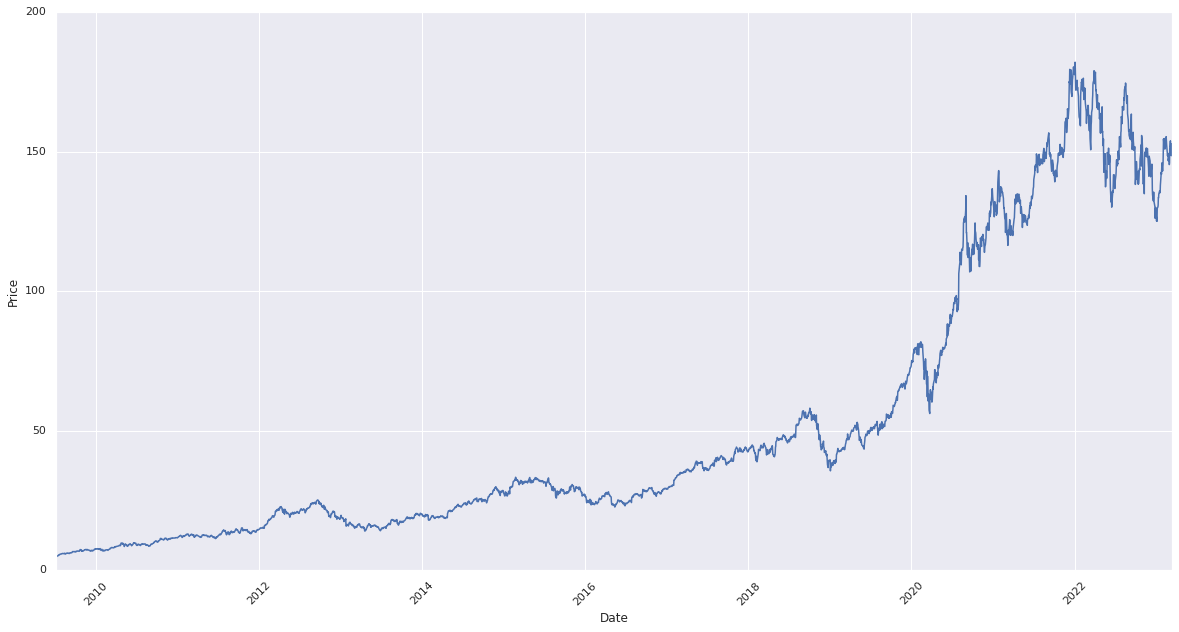

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3

RMSE:  17.52227675633936


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packag

RMSE:  5.7680747540705015


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


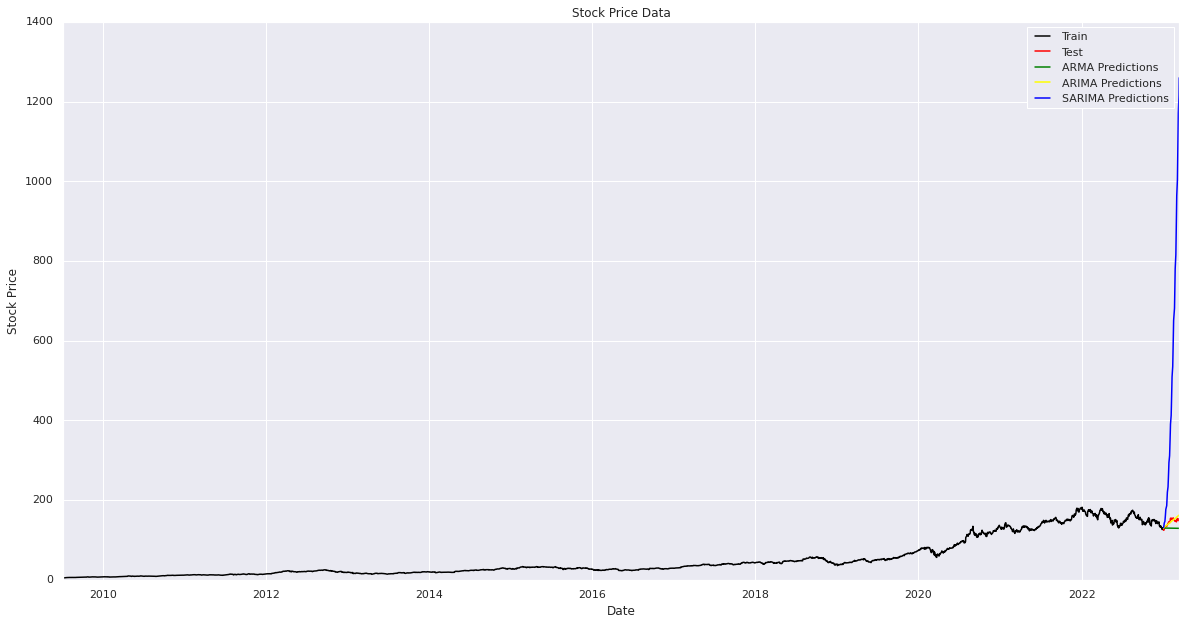

RMSE:  507.4254616781512
Enter name of stock or -1 to exit: -1
Thank you


In [9]:
## Main
if __name__=="__main__":
    
    print("Available Stocks : \n")
    print("1. Apple \n")
    print("2. Bitcoin \n")
    print("3. Netflix \n")
    
    while True:
        
        val = input('Enter name of stock or -1 to exit: ')
        
        if(val=='-1'):
            print("Thank you")
            break
        
        
        elif(val=="Apple" or val=='1'):
            stockPrice('AAPL','Apple Stock Price Analysis')
            
        elif(val=="Bitcoin" or val=='2'):
            stockPrice('BTC-USD','Bitcoin Price Analysis')
        
        elif(val=="Netflix" or val=='3'):
            stockPrice('NFLX','Netflix Stock Price Analysis')

